# CV vs LB

In [1]:
import glob
import os.path
import sys

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

SCRIPT_PATH = os.path.join('..', 'scripts')
if SCRIPT_PATH not in sys.path:
    sys.path.append(SCRIPT_PATH)

from features import CATEGORICAL_FEATURES, VECTOR_FEATURES

pd.options.display.max_rows = 100
sns.set(font='Yu Gothic')

In [3]:
submissions = pd.read_csv('submissions.csv')
subs = pd.DataFrame()

y_labels = list(range(8))
y_rate = pd.DataFrame({'y': y_labels})
y_nunique_values = []
sub_paths = []
for sub_path in glob.glob(os.path.join('*', '*_submission.csv')):
    sub = pd.read_csv(sub_path)
    y_nunique_values.append(sub.y.nunique())
    sub_paths.append(os.path.basename(sub_path))
    y_rate_ = sub.y.value_counts(normalize=True).reset_index().rename(columns={'index': 'y', 'y': os.path.basename(sub_path)})
    y_rate = pd.merge(y_rate, y_rate_, how='left')
    
    if 'id' not in subs:
        subs = sub.copy()
        subs.rename(columns={'y': os.path.basename(sub_path)}, inplace=True)
    else:
        subs = pd.merge(subs, sub.rename(columns={'y': os.path.basename(sub_path)}))

y_rate.fillna(0, inplace=True)
y_rate = y_rate.T.reset_index().rename(columns={'index': 'filename'}).query("filename != 'y'")
submissions = pd.merge(submissions, y_rate, how='left')

y_nunique = pd.DataFrame({'filename': sub_paths, 'numUniqueY': y_nunique_values})
submissions = pd.merge(submissions, y_nunique, how='left')

submissions['expNo'] = submissions.filename.apply(lambda x: x[:3])

submissions

,filename,cv,train,valid,LB,Note,0,1,2,3,4,5,6,7,numUniqueY,expNo
0,002_submission.csv,Stratified-Kfold(K=5),0.216635,0.132093,0.13110,ロジスティック回帰。class_weight=`balanced`.とりあえず作った。,0.168806,0.304307,0.097078,0.132010,0.111542,0.112666,0.006093,0.067499,8,002
1,003_submission.csv,Stratified-Kfold(K=5),0.177389,0.146417,0.12748,ロジスティック回帰。とりあえず作った。,0.583885,0.317972,0.067114,0.030584,0.000444,0.000000,0.000000,0.000000,5,003
2,004_submission.csv,Stratified-Kfold(K=5),0.237700,0.119829,0.12597,KNN。とりあえず作った。,0.514050,0.315221,0.108791,0.056229,0.005354,0.000207,0.000030,0.000118,8,004
3,005_submission.csv,Stratified-Kfold(K=5),0.157788,0.122426,0.11130,SVM。とりあえず作った。,0.706312,0.253313,0.038955,0.001420,0.000000,0.000000,0.000000,0.000000,4,005
4,006_submission.csv,Stratified-Kfold(K=5),0.390510,0.151750,0.14547,SVM。class_weight=`balanced`.とりあえず作った。,0.184453,0.462583,0.097758,0.156531,0.088027,0.007690,0.000000,0.002958,7,006
5,007_submission.csv,Stratified-Kfold(K=5),0.267113,0.137523,0.12089,全特徴量を使用したKNN,0.545581,0.268990,0.057708,0.115476,0.011122,0.000355,0.000000,0.000769,7,007
6,008_submission.csv,Stratified-Kfold(K=5),1.026566,0.753488,0.11536,全特徴量を使用したSVM. class_weight を指定。Cは1.0,0.119143,0.284075,0.000532,0.535110,0.060755,0.000207,0.000000,0.000177,7,008
7,009_submission.csv,Stratified-Kfold(K=5),0.261876,0.146291,NaN,全特徴量を使用したSVM. class_weight は指定しない。Cは1.0,0.377337,0.252159,0.000059,0.370445,0.000000,0.000000,0.000000,0.000000,4,009
8,010_submission.csv,Stratified-Kfold(K=5),0.663369,0.175991,0.12663,全特徴量を使用したSVM. class_weight を指定。Cは10.0,0.252662,0.258252,0.008193,0.471279,0.009347,0.000148,0.000000,0.000118,7,010
9,012_submission.csv,Stratified-Kfold(K=5),0.913259,0.228066,0.14379,全特徴量を使用したSVM. class_weight を指定。Cは100,0.274048,0.301083,0.054957,0.362991,0.006655,0.000148,0.000000,0.000118,7,012


In [60]:
subs

,id,002_submission.csv,003_submission.csv,004_submission.csv,005_submission.csv,006_submission.csv,007_submission.csv,008_submission.csv,009_submission.csv,010_submission.csv,012_submission.csv,014_submission.csv,015_submission.csv,016_submission.csv,017_submission.csv,018_submission.csv,019_submission.csv,020_submission.csv,021_submission.csv,022_submission.csv
0,0,1,1,1,1,1,1,1,1,1,1,1,0,1,1,2,1,1,1,1
1,1,5,1,0,1,1,3,1,0,0,1,5,0,0,1,1,1,1,0,1
2,2,4,3,1,2,2,0,3,3,3,3,4,0,2,2,2,7,7,2,2
3,3,1,0,0,0,1,0,3,3,3,3,3,0,1,1,1,3,3,2,3
4,4,1,0,1,0,1,1,1,1,1,1,3,0,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33803,33803,0,0,0,0,0,1,0,0,0,0,5,0,0,0,0,0,0,0,0
33804,33804,0,0,1,0,1,0,3,3,3,3,3,0,0,0,1,3,3,0,3
33805,33805,7,0,1,0,1,0,3,0,3,0,7,0,0,0,1,7,7,0,3
33806,33806,4,2,0,0,3,0,3,3,3,3,3,0,2,2,2,3,3,2,2


# Tree feature importances

In [35]:
imp_df = pd.DataFrame()
for filepath in glob.glob(os.path.join('*', 'feature_importances.csv')):
    exp_no = os.path.split(filepath)[0]
    print(exp_no, filepath)
    imp_df_ = pd.read_csv(filepath)
    imp_df_ = imp_df_.groupby('feature').importance.median().reset_index()
    imp_df_['importanceRank'] = imp_df_.importance.rank(ascending=False)
    imp_df_['expNo'] = exp_no
    imp_df = pd.concat([imp_df, imp_df_])
print(f'{imp_df.expNo.nunique()} files found')
imp_df

017 017\feature_importances.csv
018 018\feature_importances.csv
019 019\feature_importances.csv
020 020\feature_importances.csv
021 021\feature_importances.csv
022 022\feature_importances.csv
6 files found


,feature,importance,importanceRank,expNo
0,10a,18.480120,363.0,017
1,10b,0.000000,462.0,017
2,10c,0.000000,462.0,017
3,10d,13.303220,374.0,017
4,10e,35.575600,335.0,017
...,...,...,...,...
498,外角中心,0.001902,140.0,022
499,外角低め,0.003181,33.0,022
500,外角高め,0.001415,248.0,022
501,真ん中低め,0.001342,268.0,022


In [37]:
imp_df.groupby('feature').importanceRank.describe().sort_values('50%').reset_index()

,feature,count,mean,std,min,25%,50%,75%,max
0,distDirU,6.0,79.666667,122.191107,1.0,1.000,1.00,167.500,251.0
1,diststd,6.0,21.500000,39.642149,2.0,2.750,5.00,11.000,102.0
2,S,6.0,17.000000,28.071338,1.0,5.250,6.00,9.000,74.0
3,distmax,6.0,57.000000,113.829697,2.0,4.000,7.00,28.000,288.0
4,pitchTyped39,6.0,34.500000,58.373795,7.0,8.000,8.00,19.250,153.0
...,...,...,...,...,...,...,...,...,...
498,2i,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5
499,2j,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5
500,3b,6.0,404.500000,87.391075,292.0,331.750,454.75,461.125,471.5
501,20b,6.0,444.333333,26.272926,411.5,421.375,454.75,461.125,471.5


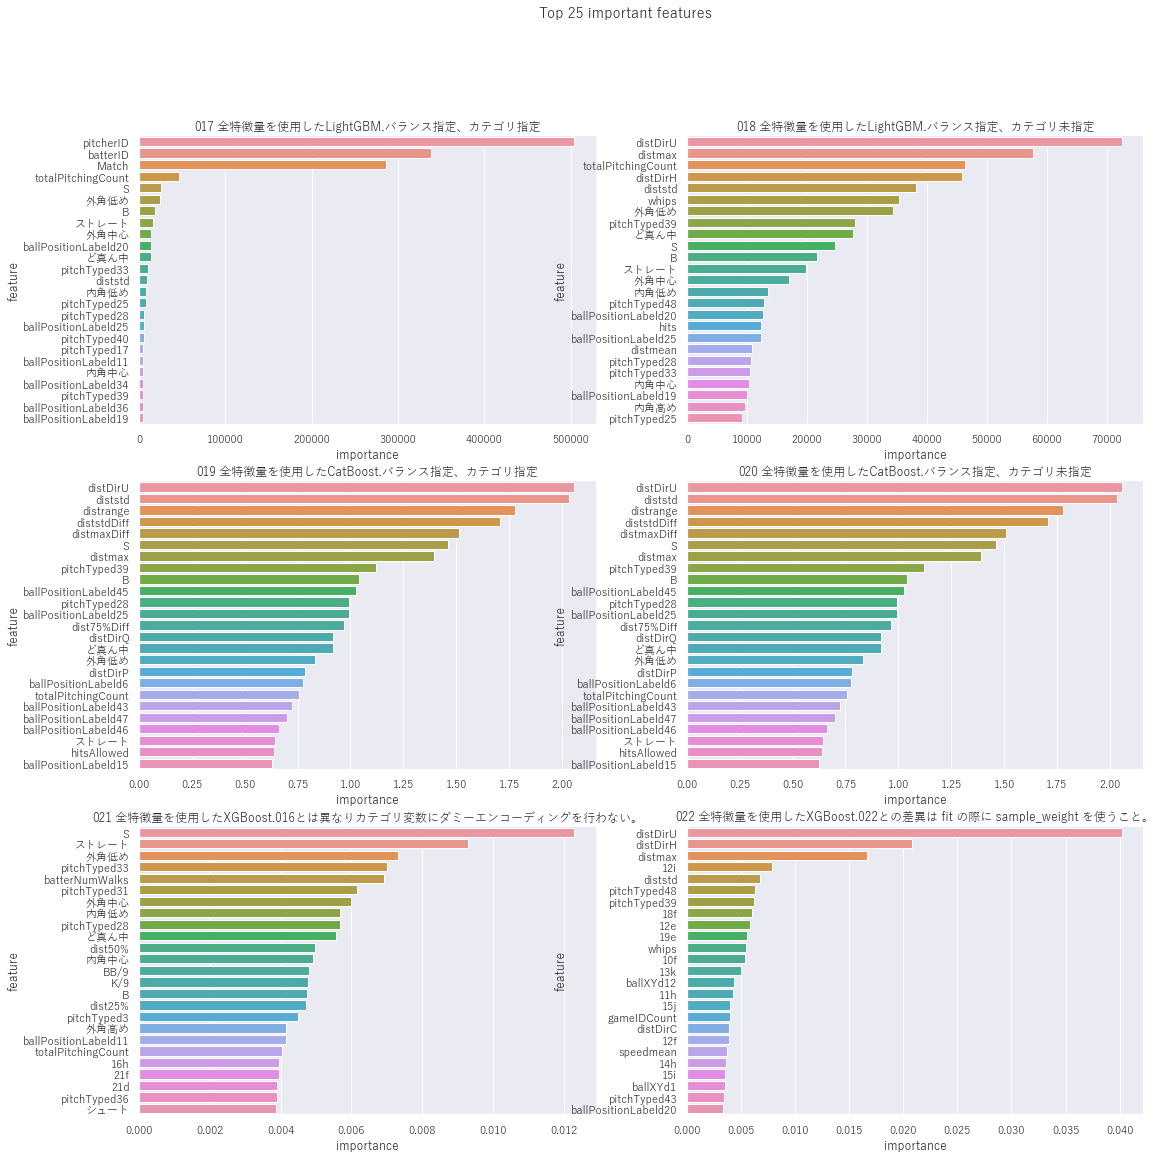

In [49]:
fig = plt.figure(figsize=(18., 18.))
fig.suptitle('Top 25 important features')
for i, (exp_no, df) in enumerate(imp_df.groupby('expNo')):
    plt.subplot(3, 2, i + 1)
    sns.barplot(y='feature', x='importance', data=df.sort_values('importanceRank').head(25))
    plt.title(exp_no + ' ' + submissions.query(f'expNo == "{exp_no}"').Note.values[0])
    sns.despine()

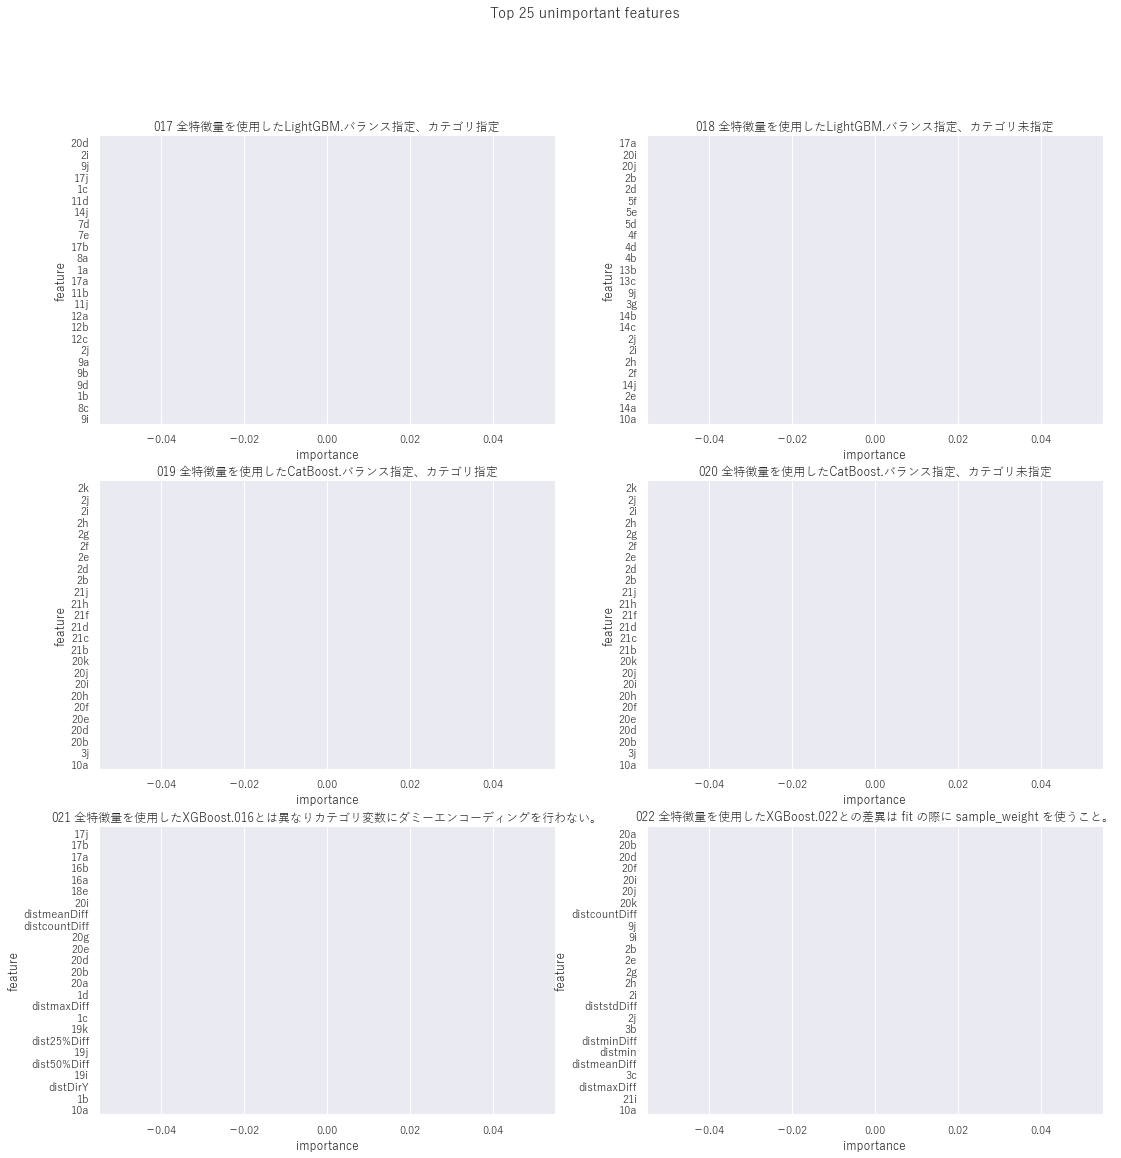

In [66]:
fig = plt.figure(figsize=(18., 18.))
fig.suptitle('Top 25 unimportant features')
for i, (exp_no, df) in enumerate(imp_df.groupby('expNo')):
    plt.subplot(3, 2, i + 1)
    sns.barplot(y='feature', x='importance', data=df.sort_values('importanceRank').tail(25))
    plt.title(exp_no + ' ' + submissions.query(f'expNo == "{exp_no}"').Note.values[0])
    sns.despine()

## 2021-06-01

- 特徴量エンジニアリング1段落。対象データは "experiments/001_EDA/" の "test_data_preprocessed.csv" "train_data_preprocessed.csv" である。
- 7番以降で以下のサブを作成する。14通りある。
  - KNN: 1通り
  - SVM(C={0.1, 1.0, 10.0, 100.0}, class_weights={None, 'balanced'}): 8通り
  - XGBoost: 1通り
  - CatBoost(class_weights={None, 'balanced'}): 2通り
  - LightGBM(class_weights={None, 'balanced'}): 2通り
- うまくいったら8,9のノートブックを改良すること

## 2021-06-02

- GBDT のモデルは `class_weights` 指定なしではお話にならないような性能になる
- XGBoost はカテゴリ変数を投じられないのでダミー変数化したが悲惨な性能（016）
  - 022 のノートブックに sample_weight を scikit-learn 的な class_weights の発送から求める例あり
- ベクトルとカテゴリの特徴量を 001_EDA\features に外部化しておいた
  - PCAで次元数をおおむね1/3程度に削減できそう
- 17, 18,19,20, は sub した。22を送信すること。

## 2021-06-03

- 正直一気に特徴突っ込んじゃって何が何だかよくわからない
- 特にベクトルの特徴量は数が多くてやっかい。

,feature,importance,fold,Experiment
0,totalPitchingCount,46399.197034,1,017
1,B,18381.812656,1,017
2,S,23083.890606,1,017
3,O,235.825036,1,017
4,b1,158.032000,1,017
...,...,...,...,...
2510,distDirV,0.002147,5,017
2511,distDirW,0.001554,5,017
2512,distDirX,0.002429,5,017
2513,distDirY,0.003257,5,017


In [6]:
filepah

'feature_importances.csv'